In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist

import warnings

In [102]:
football_df = pd.read_csv('data/cleaned-premier-League-data.csv')
#X = football_df[['avg_odd_home_win', 'avg_odd_draw', 'avg_odd_away_win']]
X = football_df[['avg_odd_home_win', 'avg_odd_draw', 'avg_odd_away_win']]





scale the data so it is ready to be using for clustering

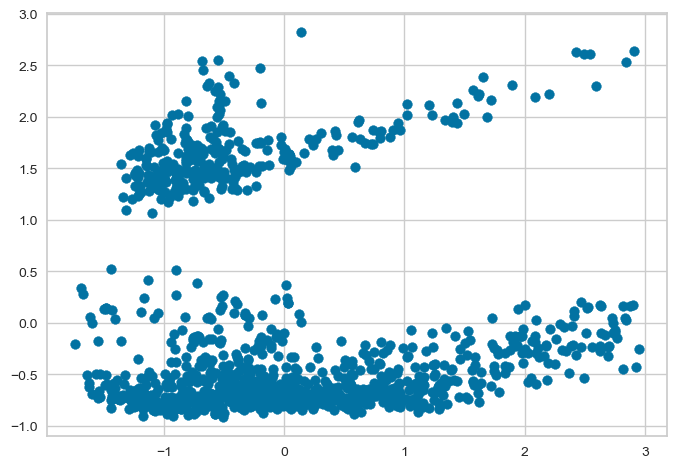

In [103]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


plt.scatter(X_scaled[:,0], X_scaled[:,1])

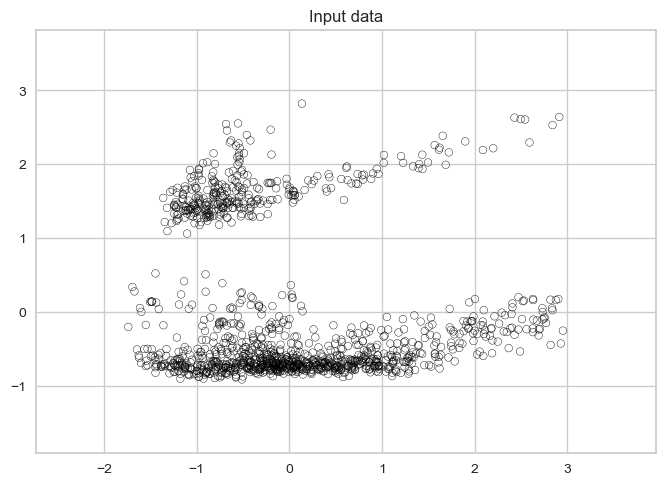

In [104]:
# Plot the input data
# a. creates figure
plt.figure()
plt.title('Input data')

# b. get the range of X and Y (long way)
# first column
x_min = X_scaled[:, 0].min()
x_max = X_scaled[:, 0].max()

# second column
y_min = X_scaled[:, 1].min()
y_max = X_scaled[:, 1].max()

# same as above: get the range of X and Y (short way)
# x_min, x_max = X[:, 0].min(), X[:, 0].max()
# y_min, y_max = X[:, 1].min(), X[:, 1].max()

# c. set plot limits
plt.xlim(x_min - 1, x_max + 1)
plt.ylim(y_min - 1, y_max + 1)

# plot the points
plt.scatter(X_scaled[:,0], X_scaled[:,1], marker='o', facecolors='none', edgecolors='black', s=30)

plt.show()

use Elbow method to find K

In [105]:
#ignore the warning about memory leak
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak")


distortions = []
K = range(2, 10)

for k in K:
    model = KMeans(n_clusters=k, n_init=10, random_state=42)
    model.fit(X_scaled)
    # distortion = average distance to closest cluster center
    distortions.append(
        sum(np.min(cdist(X_scaled, model.cluster_centers_, 'euclidean'), axis=1)) / X_scaled.shape[0]
    )

print("Distortion:", distortions)

Distortion: [1.221609019061323, 0.961762526601313, 0.797441155499938, 0.7177516079286627, 0.642884309774748, 0.5864256956514223, 0.5342836683057582, 0.48611951388847574]


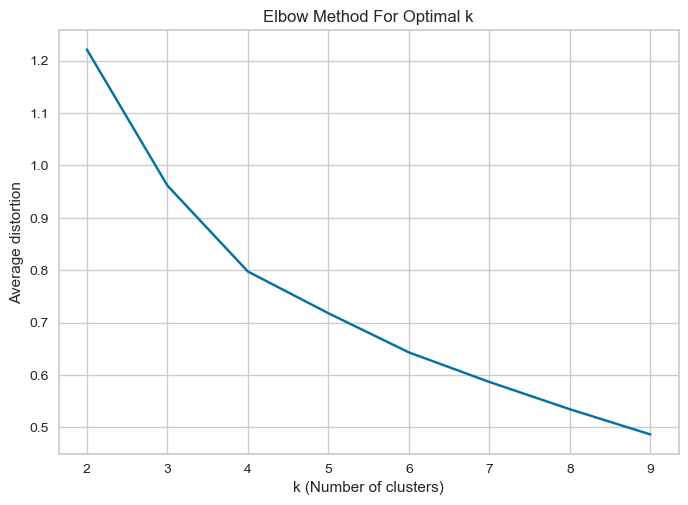

In [106]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('k (Number of clusters)')
plt.ylabel('Average distortion')
plt.title('Elbow Method For Optimal k')
plt.show()


optimal number of cluster based on elbow method

In [107]:
num_clusters = 4

In [108]:
# Create an instance of KMeans classifier
kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=20)
# init: method of experimemtal finding the initial location of the centroids
# n_init: the algorithm will run n_init times with different cetroids and the best result of those will be taken

In [109]:
# Train the KMeans clustering model
kmeans.fit(X_scaled)

KMeans(n_clusters=4, n_init=20)

Use the silhouette score to find K

In [110]:
# Determine k by maximising the silhouette score for each number of clusters
scores = []
K = range(2,10)
for k in K:
    model = KMeans(n_clusters=k, n_init=10)
    model.fit(X_scaled)
    score = metrics.silhouette_score(X_scaled, model.labels_, metric='euclidean', sample_size=len(X_scaled))
    print("\nNumber of clusters =", k)
    print("Silhouette score =", score)
    scores.append(score)


Number of clusters = 2
Silhouette score = 0.41629217016575687

Number of clusters = 3
Silhouette score = 0.4188182306132723

Number of clusters = 4
Silhouette score = 0.4672022182395739

Number of clusters = 5
Silhouette score = 0.4238701842064952

Number of clusters = 6
Silhouette score = 0.4322220478096295

Number of clusters = 7
Silhouette score = 0.4369256210591314

Number of clusters = 8
Silhouette score = 0.4408593350288759

Number of clusters = 9
Silhouette score = 0.4361286979206266


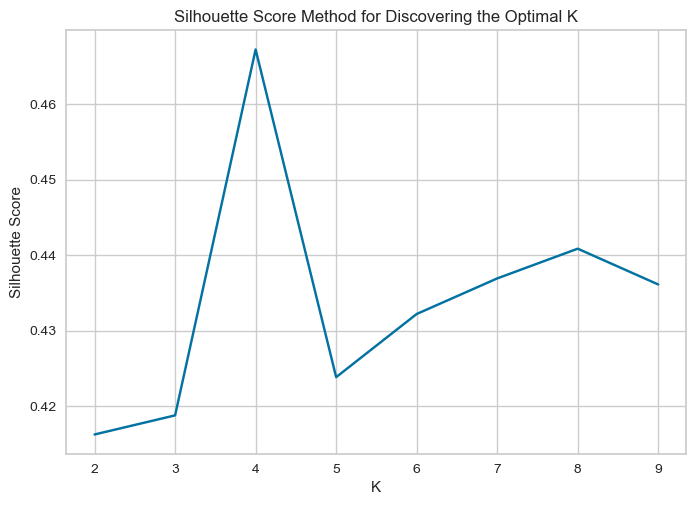

In [111]:
# Plot the elbow
plt.title('Silhouette Score Method for Discovering the Optimal K')
plt.plot(K, scores, 'bx-')
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.show()

optimal number of cluster after using both elbow and silhouette method

### Implement the model for Prediction

In [112]:
# Predict 4 clusters in X
y = kmeans.predict(X_scaled)
y

array([3, 0, 3, ..., 0, 2, 2])

### Review the clusters

Cluster  0 :  (152, 3)


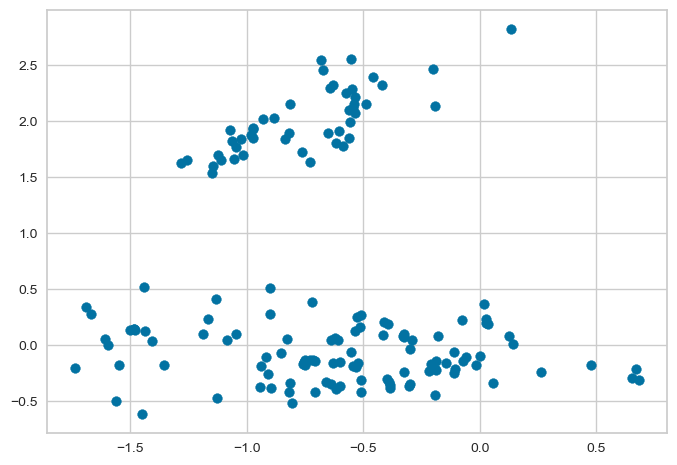

Cluster  1 :  (296, 3)


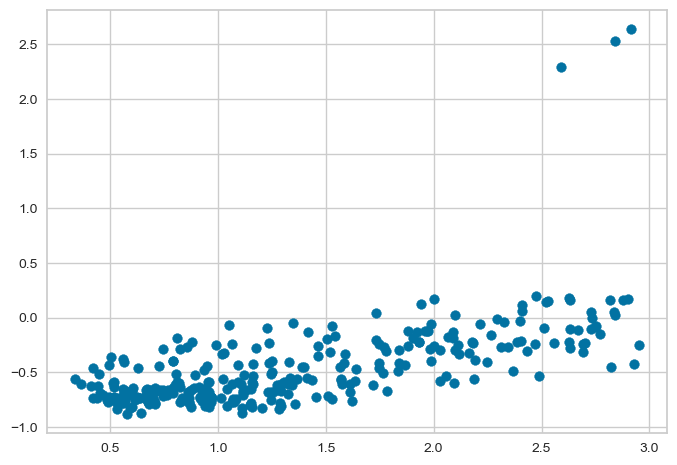

Cluster  2 :  (265, 3)


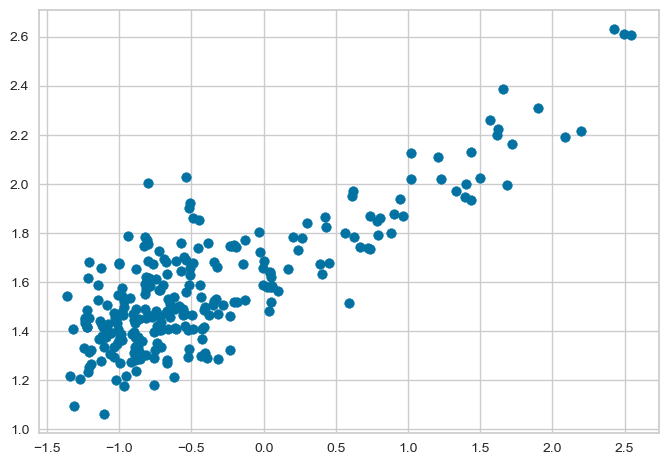

Cluster  3 :  (533, 3)


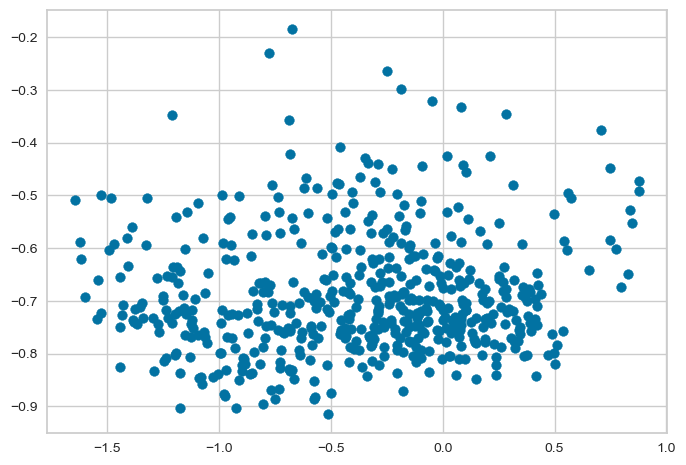

In [113]:
# Split the clusters, for demo purpose only
for i in range(num_clusters):
    # slice the cluster
    cluster = X_scaled[y == i]    
    # print the shape
    print("Cluster ", i, ": ", cluster.shape)    
    # plot the points of this cluster
    plt.scatter(cluster[:, 0], cluster[:, 1])   
    plt.grid(True)
    plt.show()

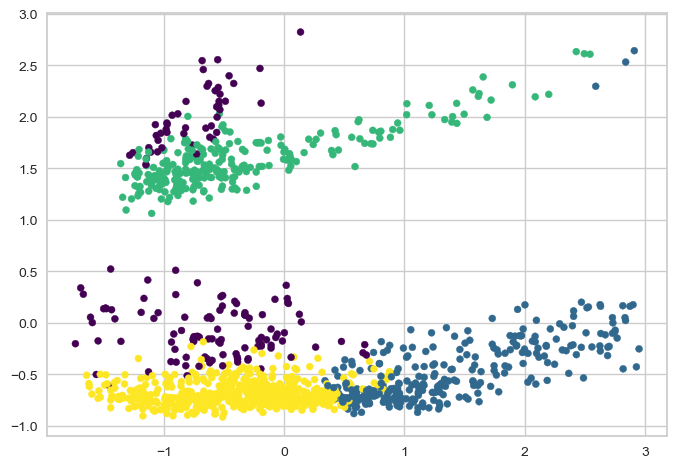

In [114]:
# Plot the points with color code of the predicted clusters
# viridis - a color map, https://matplotlib.org/users/colormaps.html
# s - marker size, here, the dots size
# c - marker color, here taken from the predicted clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, s=25, cmap='viridis')

plt.grid(True)
plt.show()

In [115]:
# See the cluster centres, created during the clustering
# cluster centres are stored in a variable named 'cluster_centers_'
print(kmeans.cluster_centers_)

[[-0.64878807  0.56201882  2.17916119]
 [ 1.36514549 -0.45804168 -0.78719555]
 [-0.39729913  1.57575402 -0.39030676]
 [-0.37557788 -0.68934585  0.00977237]]


## validate the model

In [116]:
#%pip install yellowbrick

In [117]:
from yellowbrick.cluster import SilhouetteVisualizer

In [118]:
k = 4
model = KMeans(n_clusters=k, n_init=10)
model.fit_predict(X)

array([0, 2, 0, ..., 2, 1, 1])

In [119]:
score = silhouette_score(X, model.labels_, metric='euclidean')
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.470


c:\Users\pejan\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


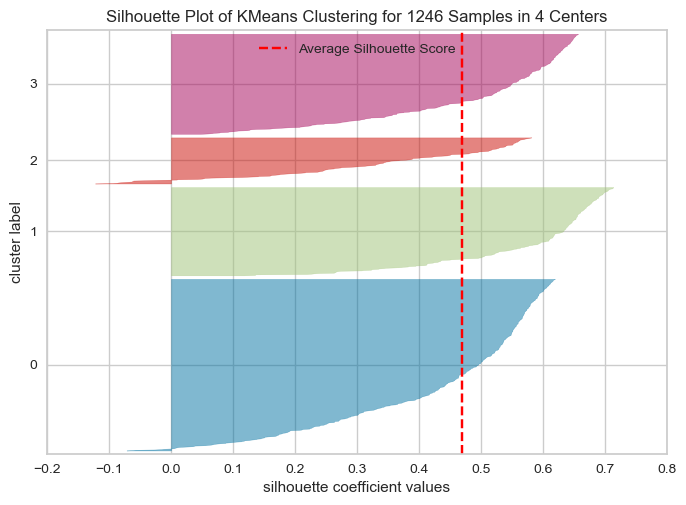

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1246 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [120]:
# Visualize the silhouette scores of all points
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X)
visualizer.show()  

In [121]:
# predict cluster of nonseen data
test = kmeans.predict([[5.8, 4.5, 3.2]])
print(test)

[0]


In [122]:
test = kmeans.predict([[5.8, 4.5, 3.2]]) == 3
print(test)

[False]


In [123]:
import joblib
joblib.dump(kmeans, 'data/kmmodel.pkl')

['data/kmmodel.pkl']